<a href="https://colab.research.google.com/github/DelRosal/DelRosal/blob/main/TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#DOWNLOAD TRAINED WEIGHTS (MODEL)

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-07-08 04:54:16--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 173.194.212.128, 173.194.215.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   169MB/s    in 0.5s    

2022-07-08 04:54:17 (169 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers

#CREATE TEMP FILE FOR DOWNLOADED INFO
local_wfile="/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

#CREATE BASIC MODEL
pre_trained_model= InceptionV3(input_shape=(150,150,3),
                                include_top=False,
                                weights=None)

pre_trained_model.load_weights(local_wfile)

for layer in pre_trained_model.layers:
  layer.trainable=False

In [ ]:
#SUMMARY
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 74, 74, 32)   864         ['input_3[0][0]']                
                                                                                                  
 batch_normalization_188 (Batch  (None, 74, 74, 32)  96          ['conv2d_188[0][0]']             
 Normalization)                                                                                   
                                                                                       

In [ ]:
#CHOOSE LAST LAYER
last_layer=pre_trained_model.get_layer("mixed7")
print("Last layer output shape: {}".format(last_layer.output_shape))
last_output=last_layer.output

Last layer output shape: (None, 7, 7, 768)


In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model

#MODEL 
x=layers.Flatten()(last_output)
x=layers.Dense(1024, activation="relu")(x)
x=layers.Dropout(0.2)(x)
x=layers.Dense(1, activation="sigmoid")(x)

model=Model(pre_trained_model.input,x)
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_282 (Conv2D)            (None, 74, 74, 32)   864         ['input_4[0][0]']                
                                                                                                  
 batch_normalization_282 (Batch  (None, 74, 74, 32)  96          ['conv2d_282[0][0]']             
 Normalization)                                                                                   
                                                                                            

In [ ]:
#COMPILE MODEL
model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
#DOWNLOAD DATASET
!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip


--2022-07-08 04:57:12--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.193.128, 172.217.204.128, 172.253.123.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip.2’

cats_and_dogs_filte 100%[===================>]  65.43M   146MB/s    in 0.4s    

2022-07-08 04:57:13 (146 MB/s) - ‘cats_and_dogs_filtered.zip.2’ saved [68606236/68606236]



In [ ]:
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

zip_ref=zipfile.ZipFile("./cats_and_dogs_filtered.zip","r")
zip_ref.extractall("tmp/")
zip_ref.close()

#CREATE DIRECTORIES
base_dir="tmp/cats_and_dogs_filtered"

train_dir=os.path.join(base_dir,"train")
validation_dir=os.path.join(base_dir,"validation")

train_cats=os.path.join(train_dir,"cats")
train_dogs=os.path.join(train_dir,"dogs")

val_cats=os.path.join(validation_dir,"cats")
val_dogs=os.path.join(validation_dir,"dogs")




In [ ]:
#DATA GENERATORS

train_datagen=ImageDataGenerator(rescale=1.0/255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1.0/255)

train_generator=train_datagen.flow_from_directory(train_dir,
                                                  batch_size=20,
                                                  class_mode="binary",
                                                  target_size=(150,150))

val_generator=test_datagen.flow_from_directory(validation_dir,
                                              batch_size=20,
                                              class_mode="binary",
                                              target_size=(150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
#TRAIN MODEL

history=model.fit(train_generator,
                  validation_data=val_generator,
                  steps_per_epoch=100,
                  epochs=20,
                  validation_steps=50)

Epoch 1/20
100/100 [==============================] - 153s 2s/step - loss: 0.2548 - accuracy: 0.8950 - val_loss: 0.0954 - val_accuracy: 0.9640
Epoch 2/20
100/100 [==============================] - 152s 2s/step - loss: 0.2285 - accuracy: 0.9125 - val_loss: 0.0956 - val_accuracy: 0.9660
Epoch 3/20
100/100 [==============================] - 153s 2s/step - loss: 0.1958 - accuracy: 0.9255 - val_loss: 0.1114 - val_accuracy: 0.9590
Epoch 4/20
100/100 [==============================] - 152s 2s/step - loss: 0.1800 - accuracy: 0.9360 - val_loss: 0.1190 - val_accuracy: 0.9580
Epoch 5/20
100/100 [==============================] - 152s 2s/step - loss: 0.1733 - accuracy: 0.9380 - val_loss: 0.0958 - val_accuracy: 0.9700
Epoch 6/20
100/100 [==============================] - 156s 2s/step - loss: 0.1607 - accuracy: 0.9410 - val_loss: 0.1384 - val_accuracy: 0.9600
Epoch 7/20
100/100 [==============================] - 154s 2s/step - loss: 0.1585 - accuracy: 0.9465 - val_loss: 0.1461 - val_accuracy: 0.9510

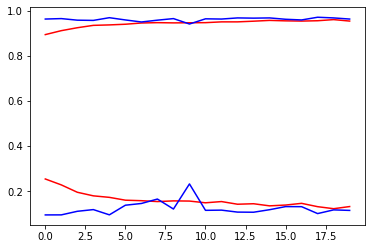

In [ ]:
#EVALUATE RESULTS

import matplotlib.pyplot as plt

acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]

loss=history.history["loss"]
val_loss=history.history["val_loss"]

epochs=range(len(acc))

plt.plot(epochs,acc,"r", label="Training Accuracy")
plt.plot(epochs,val_acc,"b", label="Validation Accuracy")

plt.plot(epochs,loss,"r", label="Training Loss")
plt.plot(epochs,val_loss,"b", label="Validation Loss")